## Leitura dos Dados e meta-dados

In [1]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn

%matplotlib inline
import matplotlib.pyplot as plt

# Opening the dataset with pandas
data_all = pd.read_csv("gds4758.csv", sep=',', index_col = 0)
# Opening the metadata
meta_all = pd.read_csv("meta-gds4758.csv", sep = ",", index_col = 0)

data_all.head()
#meta_all.head()

,GSM907858,GSM907859,GSM907860,GSM907854,GSM907855,GSM907856,GSM907857,GSM907825,GSM907828,GSM907832,...,GSM907823,GSM907808,GSM907809,GSM907810,GSM907811,GSM907812,GSM907815,GSM907817,GSM907821,GSM907824
7896736,7.98001,7.76415,7.54313,7.84693,7.49627,7.92109,7.75988,7.23496,7.77429,7.67991,...,7.25483,7.37792,7.20859,7.10271,7.07700,6.95540,7.23591,7.17572,7.01313,6.91400
7896738,5.42206,5.59312,4.77380,4.99679,5.27858,6.12362,5.10448,4.78555,4.29300,4.75807,...,4.70955,4.89731,4.73950,4.77599,4.49829,5.44083,6.18140,4.87187,4.38672,5.30893
7896740,6.74531,7.63617,6.46318,6.50367,6.47790,7.64459,6.17849,5.63094,5.86639,5.93404,...,5.67810,5.91919,6.03426,5.93513,5.79917,6.67070,7.57895,5.91335,5.32446,5.93580
7896742,9.36478,9.65509,9.67887,9.70713,9.60505,9.46327,9.68657,9.84651,9.48611,9.77404,...,9.20082,9.47752,9.43285,9.26028,9.78053,9.88431,9.32089,9.51553,9.45983,9.32106
7896744,8.22276,8.20467,7.77943,7.97956,7.72075,8.23660,6.86347,7.76701,7.35602,7.51173,...,6.19080,7.81728,7.35427,7.04910,7.32651,7.61803,8.20924,6.48359,7.09810,6.80678


In [3]:
# tamanho do dataset: linhas=pacientes, colunas=expressão de genes
print(data_all.values.shape)
# O dataset tem 33297 pacientes e 79 genes para cada paciente

(33297, 79)


In [4]:
# tamanho da meta_data
print(meta_all.values.shape)
# A metadata é composta por 79 pacientes e 5 colunas com descrições (sample, estado da doença, tecido, género e descrição)

(79, 5)


## Exploração do Dataset

In [5]:
# Descrição associada aos genes
data_all.describe()

,GSM907858,GSM907859,GSM907860,GSM907854,GSM907855,GSM907856,GSM907857,GSM907825,GSM907828,GSM907832,...,GSM907823,GSM907808,GSM907809,GSM907810,GSM907811,GSM907812,GSM907815,GSM907817,GSM907821,GSM907824
count,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,...,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000,33297.000000
mean,7.479263,7.474832,7.480576,7.460422,7.471921,7.481591,7.489707,7.488842,7.503102,7.486217,...,7.450923,7.492268,7.448367,7.466426,7.455171,7.487544,7.443075,7.449897,7.448544,7.435333
std,2.107821,2.088814,2.097620,2.133745,2.099597,2.096785,2.095882,2.182299,2.165019,2.179870,...,2.078882,2.055549,2.086622,2.069110,2.109427,2.048433,2.111164,2.110475,2.096468,2.123418
min,1.347460,1.258460,1.359360,1.194040,1.258460,1.064550,1.194040,1.173120,1.101530,1.233100,...,1.259710,1.237220,1.190460,1.382410,1.351570,1.329990,1.393670,1.219520,1.229330,1.211350
25%,6.197580,6.254010,6.214780,6.127840,6.164550,6.213010,6.222420,6.104170,6.158450,6.144360,...,6.178570,6.268220,6.212190,6.236000,6.161320,6.254290,6.143710,6.121110,6.148660,6.080080
50%,7.588790,7.578940,7.586290,7.567520,7.576180,7.579970,7.624780,7.600450,7.608120,7.614330,...,7.546520,7.595400,7.564980,7.575470,7.534780,7.595180,7.516370,7.528720,7.541610,7.513190
75%,8.837570,8.781160,8.824550,8.849780,8.841430,8.811790,8.811510,8.956660,8.927720,8.900230,...,8.804370,8.804420,8.770880,8.769060,8.819990,8.773480,8.815770,8.832880,8.817730,8.858490
max,14.656100,14.576000,14.451700,14.578500,14.639000,14.660500,14.673500,14.659900,14.688400,14.665000,...,14.644900,14.578700,14.549200,14.569600,14.598000,14.562600,14.600800,14.540900,14.545800,14.621900


In [6]:
# Descrição da base de dados associada aos pacientes
data_transposed=data_all.transpose()
data_transposed

,7896736,7896738,7896740,7896742,7896744,7896746,7896748,7896750,7896752,7896754,...,7896721,7896722,7896723,7896724,7896725,7896726,7896727,7896728,7896729,7896730
GSM907858,7.98001,5.42206,6.74531,9.36478,8.22276,11.4596,11.5180,7.64615,11.3803,9.06383,...,3.76208,13.2728,8.97044,2.40846,6.51988,6.88170,11.0265,6.17211,4.13771,10.33020
GSM907859,7.76415,5.59312,7.63617,9.65509,8.20467,11.6957,12.0540,7.89694,11.7028,9.35470,...,3.66853,11.5884,8.92587,3.28424,6.53332,6.27732,12.1166,6.06534,3.13806,9.82129
GSM907860,7.54313,4.77380,6.46318,9.67887,7.77943,10.4939,11.7118,7.49320,10.7979,9.29488,...,4.87353,13.3604,8.85374,3.62692,6.43675,7.12140,10.8153,5.36129,3.89835,9.86729
GSM907854,7.84693,4.99679,6.50367,9.70713,7.97956,11.7290,10.8122,6.51592,10.6500,8.39569,...,4.01900,13.1274,8.91017,2.28737,6.24214,7.26194,10.9820,5.76673,4.15700,10.41410
GSM907855,7.49627,5.27858,6.47790,9.60505,7.72075,11.7883,12.6071,8.86244,11.9877,8.90165,...,3.68669,13.2012,8.84725,2.05437,6.33313,6.90213,11.1596,5.52088,3.27257,10.24450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM907812,6.95540,5.44083,6.67070,9.88431,7.61803,12.0339,12.0035,8.61276,11.3833,8.80323,...,3.86021,11.1038,8.79121,2.75378,6.38470,6.75482,12.1198,5.38678,3.21083,9.42717
GSM907815,7.23591,6.18140,7.57895,9.32089,8.20924,11.8705,12.4950,9.36375,11.6904,8.31892,...,4.06562,11.4758,8.61863,4.37118,6.15693,7.26043,11.8754,6.40212,2.95142,10.26290
GSM907817,7.17572,4.87187,5.91335,9.51553,6.48359,11.6622,12.1656,8.61259,11.6173,9.13228,...,4.05374,12.1153,8.60583,2.49209,6.62890,6.98721,12.2625,6.44424,4.49731,9.83096
GSM907821,7.01313,4.38672,5.32446,9.45983,7.09810,11.9706,11.5921,7.96598,11.2278,9.31604,...,4.31914,11.6207,8.79623,2.32753,5.90434,6.89384,11.9402,7.07677,3.59737,9.31227


In [7]:
data_transposed.describe()

,7896736,7896738,7896740,7896742,7896744,7896746,7896748,7896750,7896752,7896754,...,7896721,7896722,7896723,7896724,7896725,7896726,7896727,7896728,7896729,7896730
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,...,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,7.464399,5.056055,6.232128,9.503825,7.388344,11.630057,11.826729,8.032444,11.260077,9.021659,...,3.800022,12.127838,8.833544,2.541659,6.250148,6.732019,11.888461,5.605934,3.586849,9.782239
std,0.366657,0.559722,0.746407,0.216061,0.580854,0.292885,0.622878,0.741444,0.439905,0.298644,...,0.656291,0.603434,0.138185,0.516889,0.195471,0.415352,0.469998,0.496740,0.512677,0.483195
min,6.790800,4.271100,5.113600,8.928650,5.636290,10.493900,9.681980,6.421820,10.250200,8.220070,...,2.267250,11.103800,8.487390,1.690070,5.783230,5.382480,9.796280,4.582190,2.442480,8.746000
25%,7.192155,4.705145,5.676070,9.377095,7.056825,11.443050,11.564350,7.505510,10.904350,8.812560,...,3.346925,11.615050,8.752520,2.207775,6.121340,6.484070,11.878900,5.268570,3.216080,9.496825
50%,7.496270,4.897310,6.000340,9.514190,7.463380,11.614100,11.966900,8.006670,11.309300,9.055490,...,3.860210,12.108900,8.848400,2.492090,6.251580,6.762460,12.000400,5.592600,3.485080,9.772240
75%,7.763465,5.309310,6.699895,9.628880,7.804480,11.831600,12.248600,8.543390,11.622450,9.250055,...,4.216225,12.589750,8.934015,2.795625,6.337400,6.985195,12.121450,5.898370,3.895520,10.062350
max,8.199800,6.673510,8.338200,10.010000,8.443910,12.362000,12.898600,9.631730,12.017800,9.647530,...,5.842170,13.374500,9.123590,4.371180,6.884280,7.521790,12.436600,7.076770,5.133590,11.145200


## Exploração da meta-data

In [8]:
meta_all.head()

,sample,disease.state,tissue,gender,description
GSM907858,GSM907858,Alzheimer's disease,hippocampus,male,"Value for GSM907858: AD_HI, biological rep5; s..."
GSM907859,GSM907859,Alzheimer's disease,hippocampus,male,"Value for GSM907859: AD_HI, biological rep6; s..."
GSM907860,GSM907860,Alzheimer's disease,hippocampus,male,"Value for GSM907860: AD_HI, biological rep7; s..."
GSM907854,GSM907854,Alzheimer's disease,hippocampus,female,"Value for GSM907854: AD_HI, biological rep1; s..."
GSM907855,GSM907855,Alzheimer's disease,hippocampus,female,"Value for GSM907855: AD_HI, biological rep2; s..."


In [9]:
meta_all.dtypes

sample           object
disease.state    object
tissue           object
gender           object
description      object
dtype: object

In [10]:
meta_all.describe(include = "all")

,sample,disease.state,tissue,gender,description
count,79,79,79,79,79
unique,79,2,3,2,79
top,GSM907858,non-Alzheimer's disease,frontal cortex,female,"Value for GSM907858: AD_HI, biological rep5; s..."
freq,1,47,33,42,1


In [11]:
meta_all.groupby("gender").size() 

gender
female    42
male      37
dtype: int64

In [12]:
meta_all.groupby("disease.state").size()

disease.state
Alzheimer's disease        32
non-Alzheimer's disease    47
dtype: int64

In [13]:
meta_all.groupby("tissue").size()

tissue
frontal cortex     33
hippocampus        17
temporal cortex    29
dtype: int64

## Missing - values

In [14]:
data_all.isnull().sum().sum()

0

In [15]:
meta_all.isnull().sum().sum()

0

#### Não há missing values nos dois datasets

## Exploração Gráfica

<Axes: >

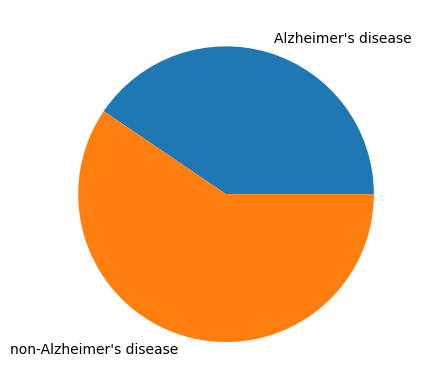

In [16]:
meta_all.groupby("disease.state").size().plot.pie()

<Axes: >

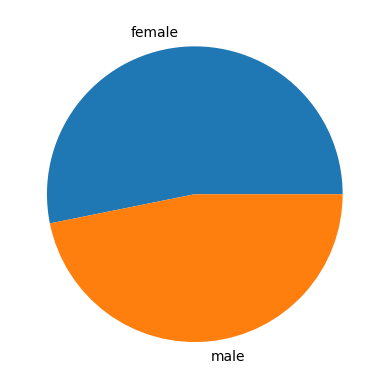

In [17]:
meta_all.groupby("gender").size().plot.pie()

<Axes: >

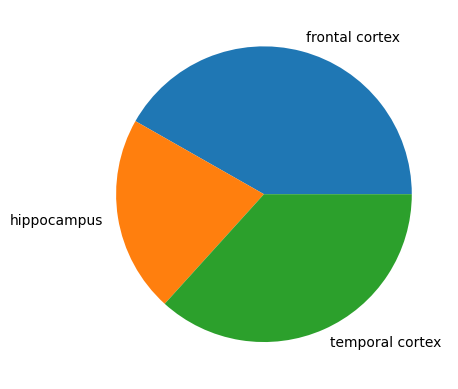

In [18]:
meta_all.groupby("tissue").size().plot.pie()

## Univariate statistical analysis and filters

In [19]:
input_data = data_all.values 
input_data=input_data.transpose()
print(input_data.shape)
input_data
#Permite transformar os dados da base de dados numa matriz que pode ser utilizada para aplicar os modelos e fazer a análise estatística

(79, 33297)


array([[ 7.98001,  5.42206,  6.74531, ...,  6.17211,  4.13771, 10.3302 ],
       [ 7.76415,  5.59312,  7.63617, ...,  6.06534,  3.13806,  9.82129],
       [ 7.54313,  4.7738 ,  6.46318, ...,  5.36129,  3.89835,  9.86729],
       ...,
       [ 7.17572,  4.87187,  5.91335, ...,  6.44424,  4.49731,  9.83096],
       [ 7.01313,  4.38672,  5.32446, ...,  7.07677,  3.59737,  9.31227],
       [ 6.914  ,  5.30893,  5.9358 , ...,  6.06081,  3.78006,  9.59383]])

### Variability analysis/ filters

#### Esta análise permite a exclusão de valores com pouca variância

In [20]:
# Permite calcular a variância associada a cada gene.
variances = input_data.var(axis = 0) 

print(variances.shape)

medvar = variances.mean()
medvar

(33297,)


0.08948632599381982

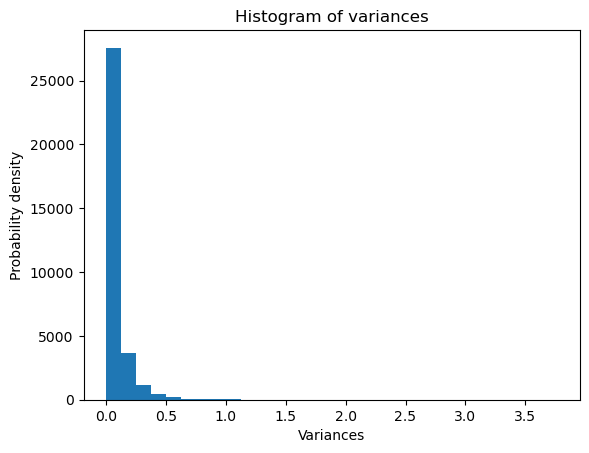

In [21]:
plt.hist(variances, bins = 30)
plt.xlabel('Variances')
plt.ylabel('Probability density')
plt.title(r'Histogram of variances')
plt.show()

In [22]:
from sklearn.feature_selection import VarianceThreshold
# vai remover todos os genes que se encontrem abaixo da variância
sel = VarianceThreshold(threshold= medvar)
input_filt = sel.fit_transform(input_data)
input_filt.shape

(79, 9153)

#### Utilizando o método da variância foram removidos 24144 (33297-9153) sujeitos que seriam pouco importantes e redundantes para o modelo

### Seleção dos genes estatisticamente relevantes (Filtração do dataset)

#### O objetivo é identificar os genes expressos diferencialmente em relação à variável alvo, neste caso, disease.state. Para tal, utiliza-se a ANOVA, que seleciona os 10% recursos com um f_value maior, e retorna o nome das colunas que possuem valores de p inferiores a 5%. Significância estatística de 95%.

In [23]:
from sklearn.feature_selection import SelectPercentile, f_classif


seletor = SelectPercentile(f_classif,percentile=10)
output_data=meta_all.values[:,1]

seletor.fit_transform(input_filt,output_data)

genes_filtrados=np.where(seletor.pvalues_<0.05)
final_data=input_data.transpose()[genes_filtrados]
print(final_data.shape)




(2269, 79)


#### Com base no disease.state, foram eliminados 24196 sujeitos com dados redundantes.

# Aprendizagem não supervisionada

### 1. Análise da forma como amostras se organizam no espaço através do PCA

In [24]:
from sklearn import preprocessing

input_sc = preprocessing.scale(final_data).transpose()

print("Average: ", input_sc.mean())
print("Standard Deviation: ", input_sc.std())

Average:  -2.0612561302043063e-16
Standard Deviation:  0.9999999999999999


In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
X_r = pca.fit(input_sc).transform(input_sc)

print('Explained Variance: %s'% str(pca.explained_variance_ratio_))

pca.explained_variance_ratio_.sum()

Explained Variance: [0.16689814 0.11867185 0.08018991 0.04969823 0.04714901 0.03715335
 0.03558541 0.02838864 0.02465643 0.0227177  0.02053092 0.01943443
 0.01654136 0.01534934 0.01358147 0.01255128 0.01185176 0.0112321
 0.01067232 0.00973096]


0.7525846152859978

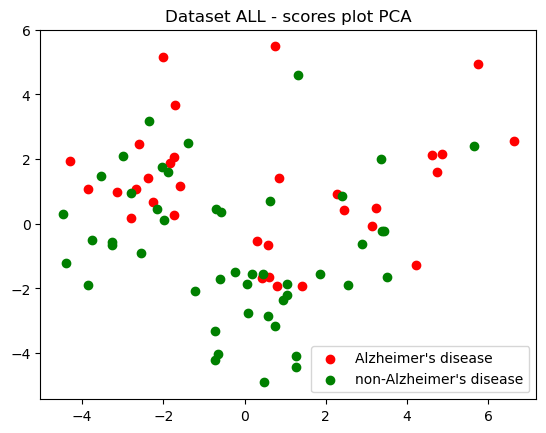

In [26]:
plt.figure()
for c, name in zip("rgb", ["Alzheimer's disease", "non-Alzheimer's disease"]):
    plt.scatter(X_r[output_data == name, 0], X_r[output_data == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA')
plt.show()

In [27]:
output_tissue=meta_all.values[:,2]


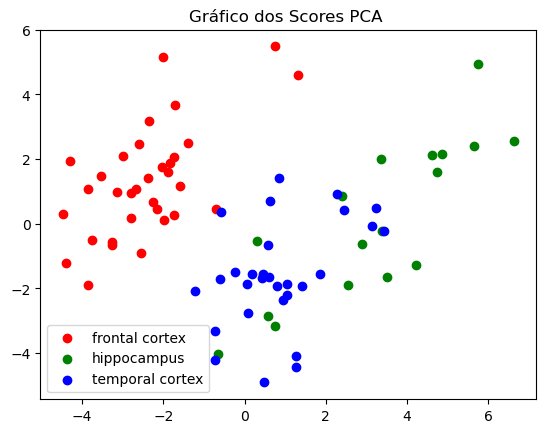

In [28]:
plt.figure()
for c, name in zip("rgb", ["frontal cortex", "hippocampus","temporal cortex"]):
    plt.scatter(X_r[output_tissue == name, 0], X_r[output_tissue == name, 1],c=c, label=name)
plt.legend()
plt.title('Gráfico dos Scores PCA ')
plt.show()

### 2. Criação de clusters 

### 3. Previsão de testes de treino

# Supervised machine learning

### Previsão do estado da doença

### Split para dados de treino e de teste

In [29]:
from sklearn.model_selection import train_test_split
input_class=final_data.transpose()
output_class= meta_all["disease.state"]

#30% para dados de teste, random_state se estiver a 0 dá sempre os mesmos dados para treino e para teste.
#se random_state não for referenciado obtemos diferentes conjuntos de teste e de treino em cada execução e fica fora do controle.
# temos de colocar stratify como o output_class caso contrário não vamos ter a mesma proporção de dados de treino e de teste.
train_in,test_in,train_out,test_out=train_test_split(
    input_class,output_class,test_size=0.3,random_state=30, stratify=output_class)


In [30]:
print("Input treino: ",train_in.shape)
print("Output treino: ",train_out.shape)

print("Input teste: ",test_in.shape)
print("Output teste", test_out.shape)

# Nota: o output deverá ser somente o valor previsto para o disease.state.

Input treino:  (55, 2269)
Output treino:  (55,)
Input teste:  (24, 2269)
Output teste (24,)


In [31]:
#Exemplo entrada
train_in

array([[9.1215 , 8.23862, 8.97261, ..., 8.57627, 9.40645, 8.00377],
       [9.43285, 7.15491, 8.62149, ..., 8.02487, 9.88513, 8.50175],
       [9.5066 , 7.12705, 9.08543, ..., 8.41331, 9.39954, 8.23673],
       ...,
       [9.55219, 8.69055, 9.13568, ..., 8.15902, 9.50424, 8.57545],
       [9.58462, 7.92568, 8.54794, ..., 8.2951 , 9.45384, 8.31072],
       [9.51419, 8.7087 , 9.3983 , ..., 8.73574, 9.27777, 8.16791]])

In [32]:
#Exemplo de saída 
train_out

GSM907870    non-Alzheimer's disease
GSM907809    non-Alzheimer's disease
GSM907838    non-Alzheimer's disease
GSM907843    non-Alzheimer's disease
GSM907859        Alzheimer's disease
GSM907850    non-Alzheimer's disease
GSM907819    non-Alzheimer's disease
GSM907847    non-Alzheimer's disease
GSM907817    non-Alzheimer's disease
GSM907798        Alzheimer's disease
GSM907865    non-Alzheimer's disease
GSM907794        Alzheimer's disease
GSM907805        Alzheimer's disease
GSM907808    non-Alzheimer's disease
GSM907851    non-Alzheimer's disease
GSM907858        Alzheimer's disease
GSM907835    non-Alzheimer's disease
GSM907800        Alzheimer's disease
GSM907854        Alzheimer's disease
GSM907839    non-Alzheimer's disease
GSM907857        Alzheimer's disease
GSM907833        Alzheimer's disease
GSM907864    non-Alzheimer's disease
GSM907825        Alzheimer's disease
GSM907868    non-Alzheimer's disease
GSM907828        Alzheimer's disease
GSM907844    non-Alzheimer's disease
G

### KNN 

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(train_in, train_out) # fit para o treino
knn_pred_Y = knn.predict(test_in) # fit para o teste
print('Precision: %0.2f' % precision_score(test_out, knn_pred_Y, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, knn_pred_Y, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, knn_pred_Y))

Precision: 0.75
Recall: 0.75
Accuracy: 0.75


#### Confusion Matrix KNN

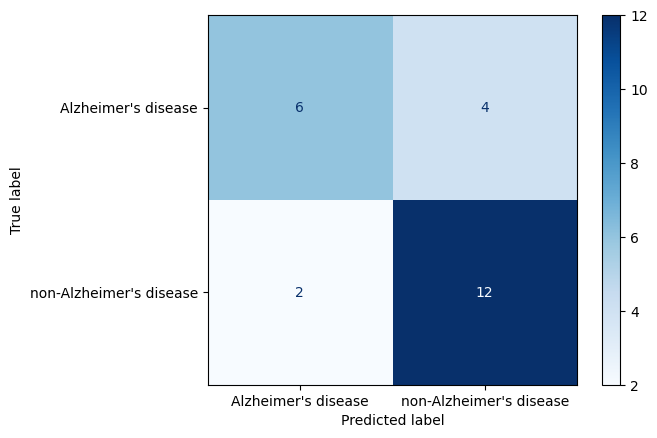

In [34]:
knn_cm = ConfusionMatrixDisplay.from_predictions(test_out, knn_pred_Y, display_labels=knn.classes_, cmap='Blues')
knn_cm

### Decision Tree

In [35]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()
tree_model.fit(train_in, train_out)

tree_y_pred = tree_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, tree_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, tree_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, tree_y_pred))

Precision: 0.63
Recall: 0.62
Accuracy: 0.62


#### Confusion Matrix

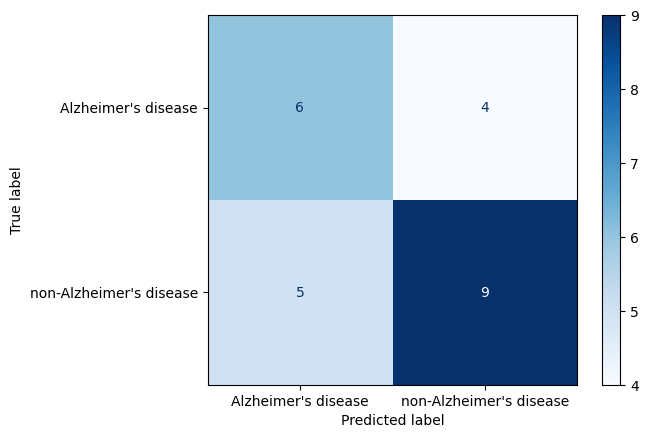

In [36]:
tree_cm = ConfusionMatrixDisplay.from_predictions(test_out, tree_y_pred, display_labels=tree_model.classes_, cmap='Blues')
tree_cm

### Naive-Bayes

In [37]:
from sklearn.naive_bayes import GaussianNB

gnb_model = GaussianNB()
gnb_model.fit(train_in, train_out)

gnb_y_pred = gnb_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, gnb_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, gnb_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, gnb_y_pred))


Precision: 0.71
Recall: 0.71
Accuracy: 0.71


#### Confusion Matrix

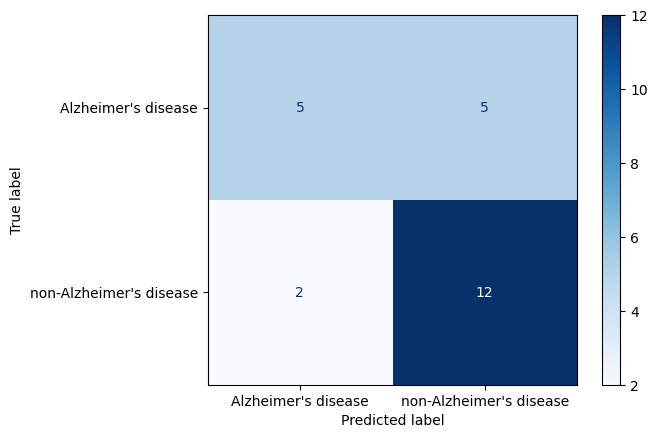

In [38]:
gnb_cm = ConfusionMatrixDisplay.from_predictions(test_out, gnb_y_pred, display_labels=gnb_model.classes_, cmap='Blues')
gnb_cm

### SVM

In [40]:
from sklearn import svm

svm_model = svm.SVC(kernel = "linear")
svm_model.fit(train_in, train_out)

svm_y_pred = svm_model.predict(test_in)

print('Precision: %0.2f' % precision_score(test_out, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(test_out, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(test_out, svm_y_pred))

Precision: 0.85
Recall: 0.79
Accuracy: 0.79


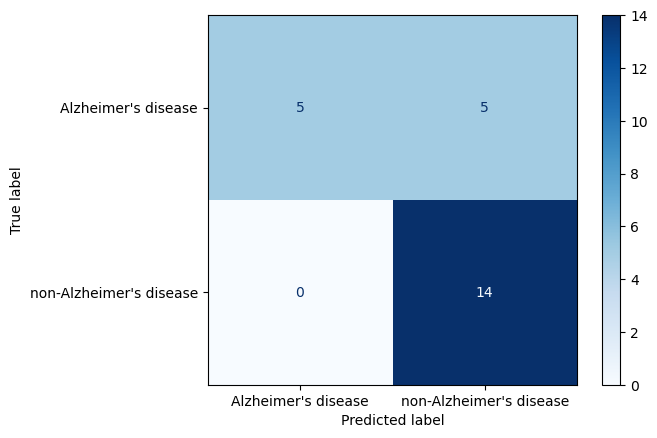

In [41]:
svm_cm = ConfusionMatrixDisplay.from_predictions(test_out, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm